In [2]:
import sys
import os
script_dir = os.getcwd() # coleata o diretorio do projeto atual
sys.path.append(script_dir)

In [3]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
!git clone https://github.com/valmirf/processamento_imagens.git

fatal: destination path 'processamento_imagens' already exists and is not an empty directory.


#Exercícios

## 1) Utilize operações básicas para diminuir o ruído da imagem abaixo:

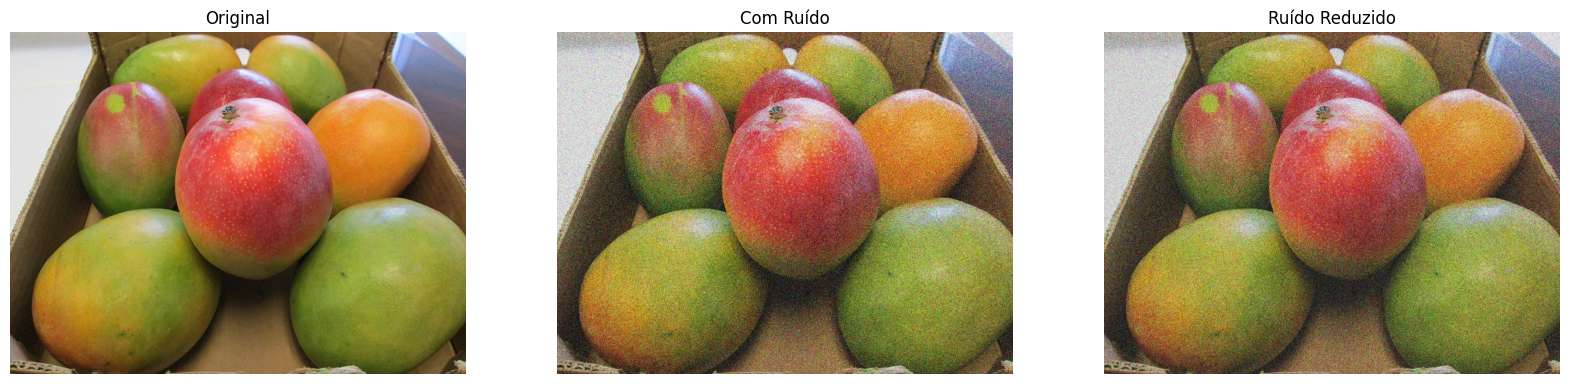

In [12]:

def add_noise(image, mean=0, stddev=25):
    """Adiciona ruído gaussiano à imagem."""
    row, col, ch = image.shape
    gauss = np.random.normal(mean, stddev, (row, col, ch))
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255)  # Garante que os valores fiquem dentro do intervalo [0, 255]
    return noisy.astype(np.uint8)


def reduz_noise(noisy_image, n_runs=10, mean=0, stddev=25):
    """
    Reduz o ruído de uma imagem ao adicionar ruído gaussiano múltiplas vezes e calcular a média das imagens resultantes.
    
    Parâmetros:
    noisy_image (numpy.ndarray): A imagem original com ruído, representada como um array NumPy.
    n_runs (int): O número de vezes que o ruído gaussiano será adicionado à imagem.
    mean (float): A média da distribuição normal do ruído gaussiano.
    stddev (float): O desvio padrão da distribuição normal do ruído gaussiano.
    
    Retorna:
    retorna a imagem com ruído reduzido
    """
    row, col, ch = noisy_image.shape
    imagem_resultante = []

    for time in range(n_runs): # loop principal que gera o ruído e adiciona a imagem a alista para a soma
        gauss = np.random.normal(mean, stddev, (row, col, ch))
        noisy_with_gauss = noisy_image + gauss
        noisy_with_gauss = np.clip(noisy_with_gauss, 0, 255)  # Garante que os valores fiquem dentro do intervalo [0, 255]
        imagem_resultante.append(noisy_with_gauss)
    
    imagem_resultante = np.array(imagem_resultante) # sai de tipo lista para arrey

    # Soma das imagens
    soma_imagens = np.sum(imagem_resultante, axis=0) 

    # Média das imagens
    clean_image = soma_imagens / n_runs
    clean_image = np.clip(clean_image, 0, 255) # caso tenha ultrapassado 255 ou 0 devolve o valor ao aos limites

    return clean_image.astype(np.uint8)
    

image = cv2.imread('processamento_imagens/imagens/mangas.jpg')

# Adiciona ruído à imagem
noisy_image = add_noise(image, 0, 60)

# Reduz o ruído da imagem com ruído
clean_image = reduz_noise(noisy_image, 100)


# Exibe a imagem original e a imagem com ruído
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
ax = axes.ravel()
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].set_axis_off()
ax[1].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Com Ruído')
ax[1].set_axis_off()
ax[2].imshow(cv2.cvtColor(clean_image, cv2.COLOR_BGR2RGB))
ax[2].set_title('Ruído Reduzido')
ax[2].set_axis_off()



## 2) Destaque apenas os aviões utizando as imagens abaixo com as operações de imagens.

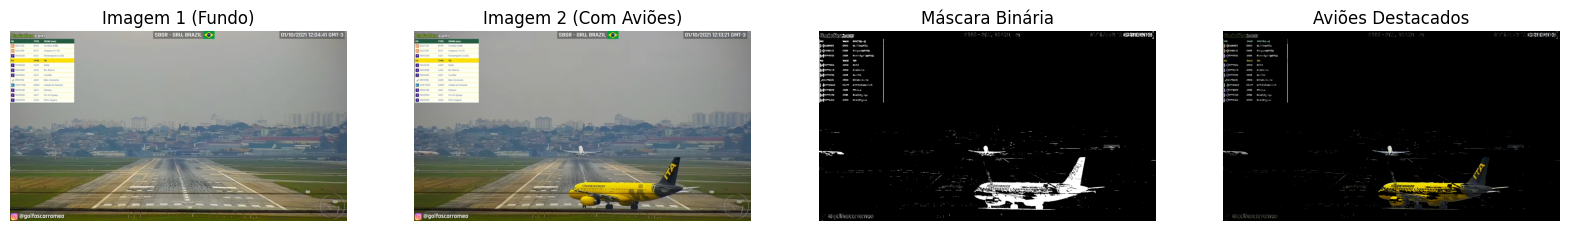

In [36]:
imggru1 = cv2.imread('processamento_imagens/imagens/fundo_aeroporto.png')
imggru2 = cv2.imread('processamento_imagens/imagens/avies_aeroporto.png')

# converte as imagens para escala de cinza
gray1 = cv2.cvtColor(imggru1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(imggru2, cv2.COLOR_BGR2GRAY)

# subtrai a imagem de fundo da imagem com aviões
diferenca = cv2.absdiff(gray2, gray1)

# Aplique limiarização para obter uma máscara binária
_, mask = cv2.threshold(diferenca, 35, 255, cv2.THRESH_BINARY) # qualquer valor maior que 35 nesse caso serão defivnicos como 255 (branco), iusso gera uma mascara branca

# Use a máscara para extrair os aviões da imagem original
masked_img = cv2.bitwise_and(imggru2, imggru2, mask=mask) # Usa  and para coletar os valores da imagem horiginal que tambem existaão na imagem binaria

# Mostrar as imagens
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
ax = axes.ravel()

ax[0].imshow(cv2.cvtColor(imggru1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Imagem 1 (Fundo)')
ax[0].set_axis_off()

ax[1].imshow(cv2.cvtColor(imggru2, cv2.COLOR_BGR2RGB))
ax[1].set_title('Imagem 2 (Com Aviões)')
ax[1].set_axis_off()

ax[2].imshow(mask, cmap='gray')
ax[2].set_title('Máscara Binária')
ax[2].set_axis_off()

ax[3].imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
ax[3].set_title('Imagem Destacada')
ax[3].set_axis_off()

plt.show()


## 3) Utilize rotação pra tentar deixar a torre abaixo reta

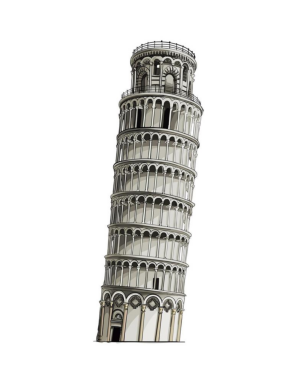

In [7]:
img = cv2.imread('processamento_imagens/imagens/pisa_inclinada.jpg')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 4) Utilize as técnicas de inteporlação na imagem abaixo pra melhorar sua resolução

a) Vizinhos mais próximos
b) Bicúbica

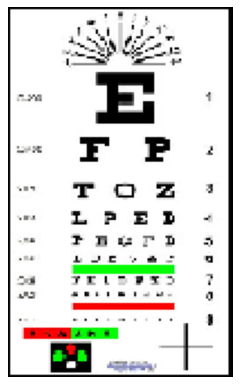

In [8]:
img = cv2.imread('processamento_imagens/imagens/baixa_resolucao.png')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 5) Utilize as técnicas abaixo pra tentar melhorar a qualidade da imagem abaixo:

a) Brilho
b) Contraste
c) Equalização do histograma

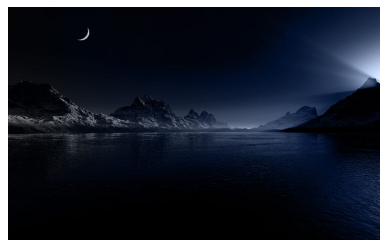

In [9]:
img = cv2.imread('processamento_imagens/imagens/paisagem_escura.jpg')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 6) Utilize as técnicas de alteração de cores em cada canal para transformar a imagem original numa imagem sépia, semelhante ao exemplo.

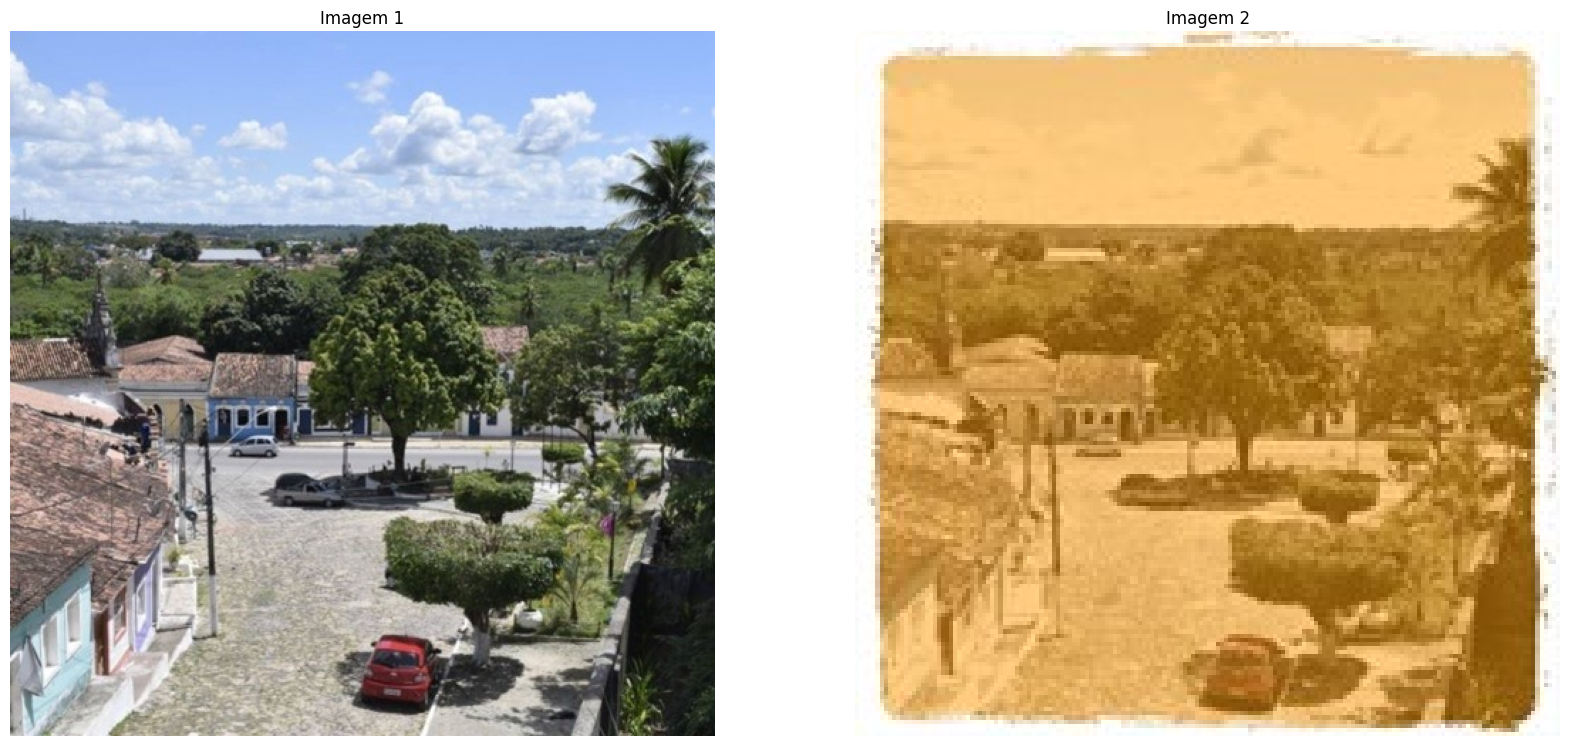

In [10]:
imggru1 = cv2.imread('processamento_imagens/imagens/igarassu.jpg')
imggru2 = cv2.imread('processamento_imagens/imagens/igarassu_sepia.jpg')


fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes.ravel()
ax[0].imshow(cv2.cvtColor(imggru1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Imagem 1')
ax[0].set_axis_off()
ax[1].imshow(cv2.cvtColor(imggru2, cv2.COLOR_BGR2RGB))
ax[1].set_title('Imagem 2')
ax[1].set_axis_off()

## 7) Utilize as técnicas de binarização para encontrar a melhor versão binarizada da imagem abaixo. Mostre comparações entre técnicas e parâmetros.

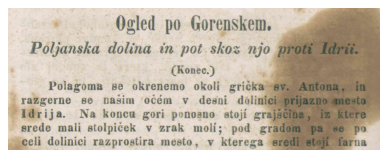

In [11]:
img = cv2.imread('processamento_imagens/imagens/PR4.bmp')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))